# 📍 Simple Spatial Analysis

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.14


In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### Compute the distances among cell types.

In [3]:
adata = sm.tl.spatial_distance (adata, phenotype='phenotype')

Processing Image: exemplar-001--unmicst_cell


We'll utilize built-in plotting functions for visualization; however, for those interested in conducting additional analysis or custom plotting of these distances, the results can be found in `adata.uns['spatial_distance']`.

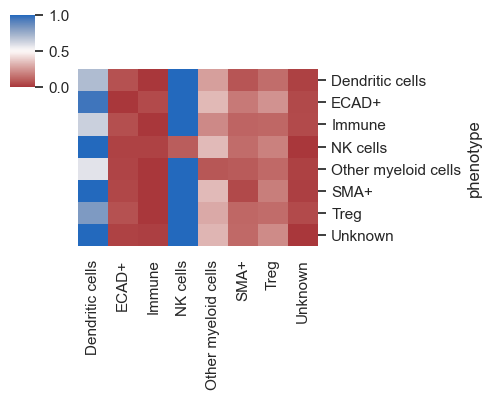

In [4]:
# This is one of the most complicated plotting functions in the package
# as I packed a lot of options into one (see the documentation)
# I will try and split this into multiple functions in the future
# To start- let's get an overview with a heatmap

sm.pl.spatial_distance (adata, figsize=(5,4))

For datasets containing multiple images, the default behavior averages the distances across all images. To analyze and plot the distances for each image individually, you should set `heatmap_summarize` to `False`. Although in this example with only one image the plot will appear similar to the previous one, you'll observe a difference in the y-axis.

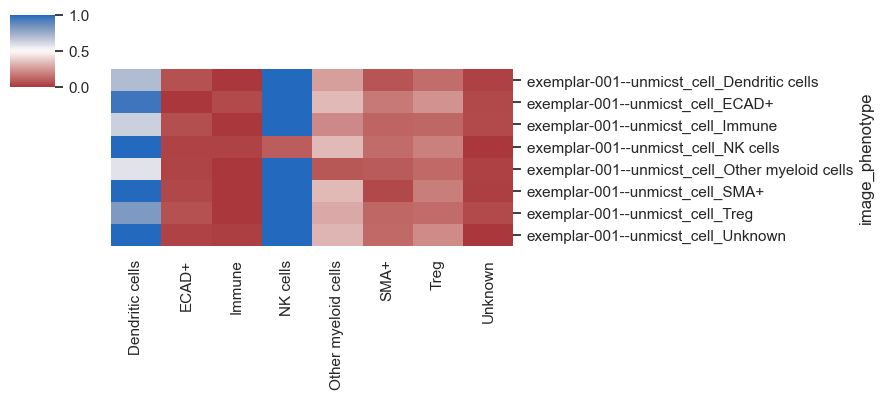

In [5]:
sm.pl.spatial_distance (adata, heatmap_summarize=False, figsize=(9,4))

By default, summarization is performed using the `imageid` column, but you can also plot based on different conditions (such as control vs. treated) present in the dataset. Since we've included Regions of Interest (ROIs) in this dataset, let's attempt to plot the data based on these ROIs.

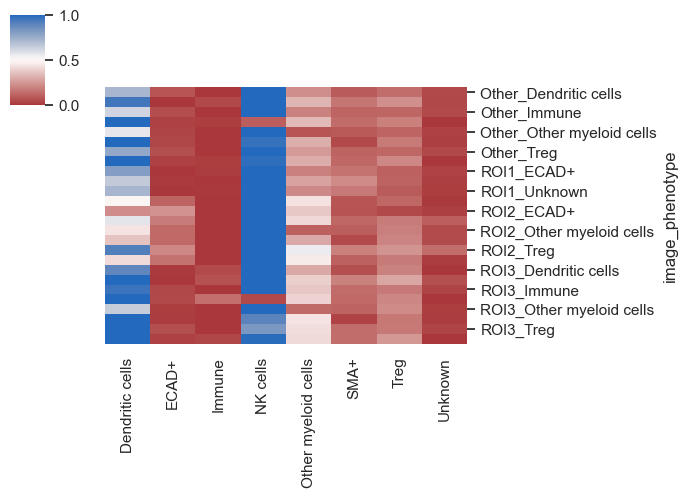

In [6]:
sm.pl.spatial_distance (adata, heatmap_summarize=False, imageid='ROI', figsize=(7,5))

These heatmaps provide a comprehensive overview of the proximity between cell types and how this proximity varies by ROIs, conditions, or across different images. After gaining an understanding of the broader landscape and possibly formulating some hypotheses, it's time to delve into a more detailed analysis.

Let's say there is an interest in identifying the cells closest to tumor cells; we will do the following analysis to address this interest.

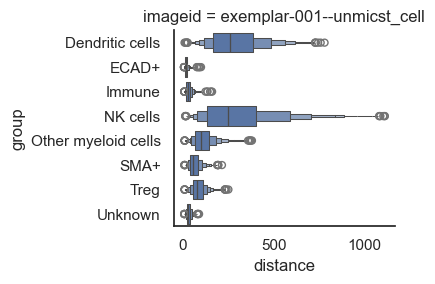

In [7]:
# Numeric plot of the shortest distance of phenotypes from tumor cells

sm.pl.spatial_distance (adata, method='numeric',distance_from='ECAD+', height=3, aspect=11/8)


From the above plot, it's clear that NK cells and dendritic cells are distant from the tumor cells, while other cell types are so closely positioned that it's difficult to distinguish them. So, let's log the x-axis to make the pattern more distinct.

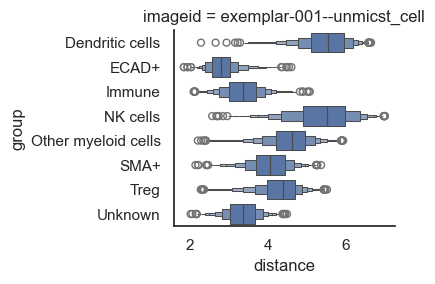

In [8]:
sm.pl.spatial_distance (adata, method='numeric',distance_from='ECAD+', log=True, height=3, aspect=11/8)


Excellent, now let's say you're interested in comparing these observations between different conditions in your dataset (such as control vs. treatment). Since our dataset doesn't include multiple images, we'll use the ROIs as a substitute once again, as the underlying concept remains the same.

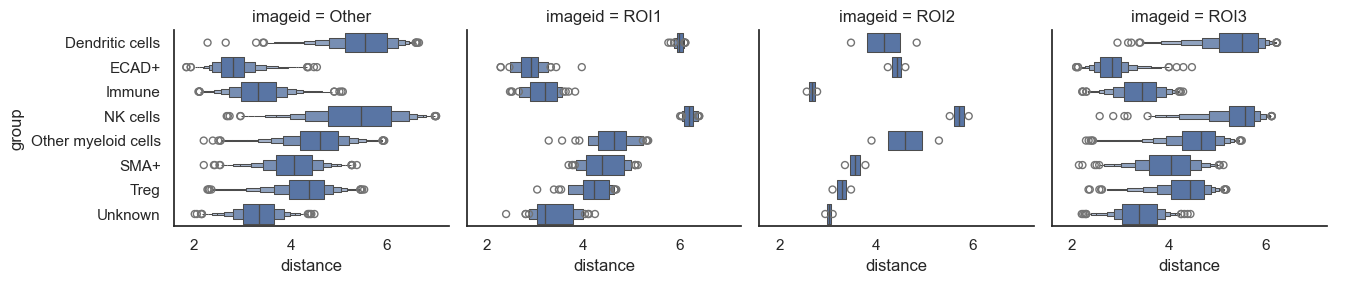

In [9]:
sm.pl.spatial_distance (adata, method='numeric',distance_from='ECAD+', log=True, imageid='ROI', height=3, aspect=9/8)

Now, let's say you've narrowed down to a few cell types of interest. We can also subset and display only these selected cells.

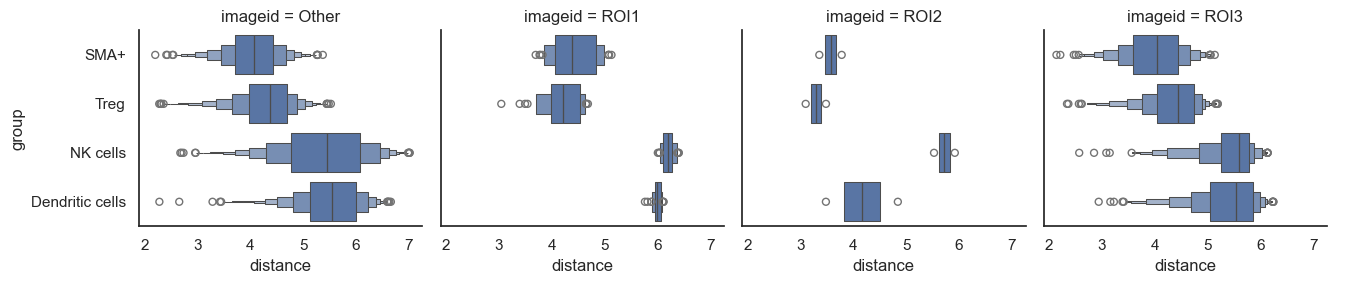

In [10]:
distance_to = ['SMA+', 'Treg', 'NK cells', 'Dendritic cells']
sm.pl.spatial_distance (adata, method='numeric', 
                        distance_from='ECAD+', distance_to=distance_to, 
                        log=True, imageid='ROI', 
                        height=3, aspect=9/8)

We can also visualize this using distribution plots instead of box plots, which is particularly useful if you want to demonstrate that the distance between two cell types vary across different conditions. However, in this case, the difference might not be apparent since we are working with demo data.

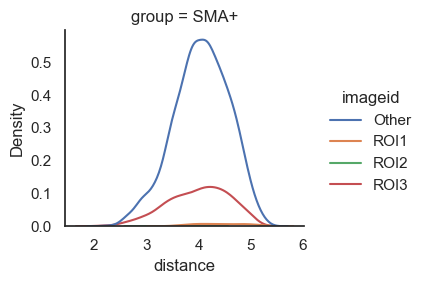

In [11]:
sm.pl.spatial_distance (adata, method='distribution',distance_from='ECAD+',distance_to = 'SMA+', imageid='ROI', log=True, height=3, aspect=9/8)

### Save Results

In [12]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')